# seaborn
---
[seaborn](https://seaborn.pydata.org/)
- matploblib 기반의 시각화 라이브러리
- figure-level과 axes-level
  - figure-level: **seaborn** ▷ `relplot`, `displot`, `catplot`
  - axes-level: **matplotlib**

In [1]:
# !pip install --upgrade seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(sns.__version__)

0.12.2


데이터 준비
- penguins

In [3]:
df = sns.load_dataset('penguins')
df.shape

(344, 7)

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [8]:
# 각 섬별 펭귄의 개수
df.groupby(['island'])['species'].count()

island
Biscoe       168
Dream        124
Torgersen     52
Name: species, dtype: int64

In [9]:
# 성별의 개수
df['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [10]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

### axes-level

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

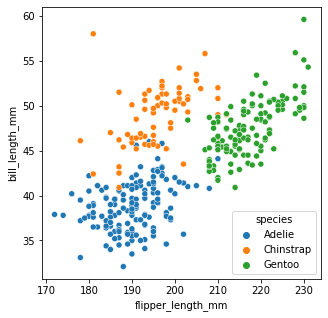

In [11]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='flipper_length_mm', y='bill_length_mm', hue='species')

<AxesSubplot:xlabel='species', ylabel='Count'>

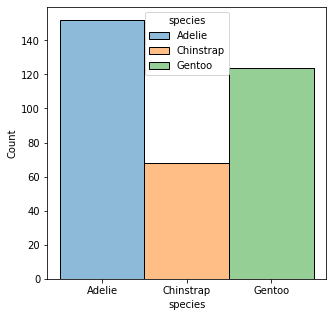

In [12]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='species', hue='species')

<AxesSubplot:xlabel='species', ylabel='Count'>

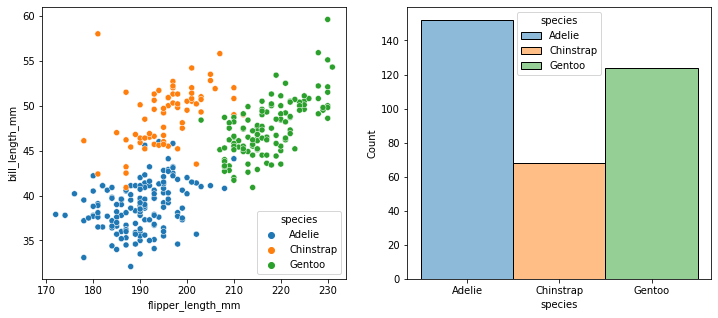

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='flipper_length_mm', y='bill_length_mm', hue='species', ax=axes[0])
sns.histplot(data=df, x='species', hue='species', ax=axes[1])

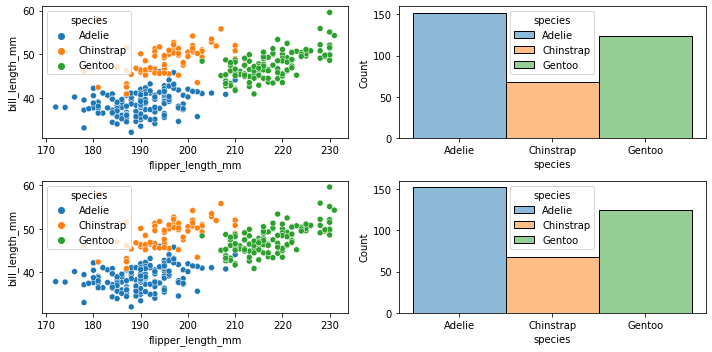

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

for i, axis in enumerate(axes.flatten()):
    if i%2 == 0:
        sns.scatterplot(data=df, x='flipper_length_mm', y='bill_length_mm', hue='species', ax=axis)
    else:
        sns.histplot(data=df, x='species', hue='species', ax=axis)
plt.tight_layout()

### figure-level

displot

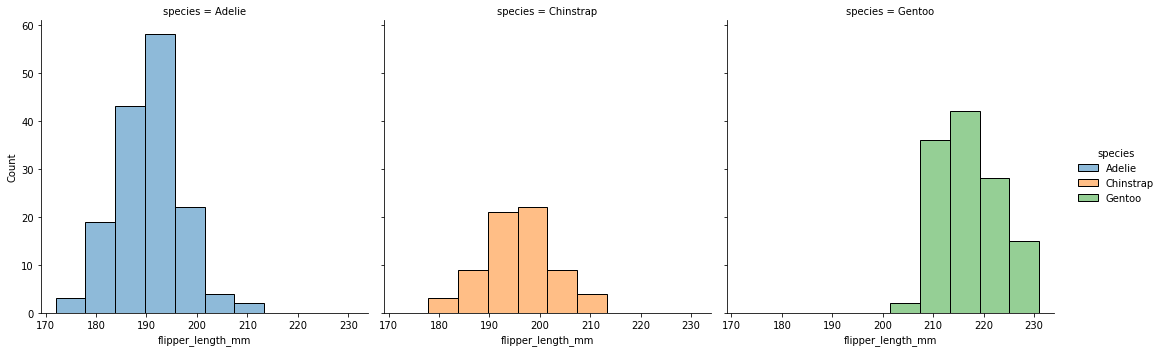

In [15]:
sns.displot(data=df, x='flipper_length_mm', 
            kind='hist', 
            hue='species', 
            col='species')

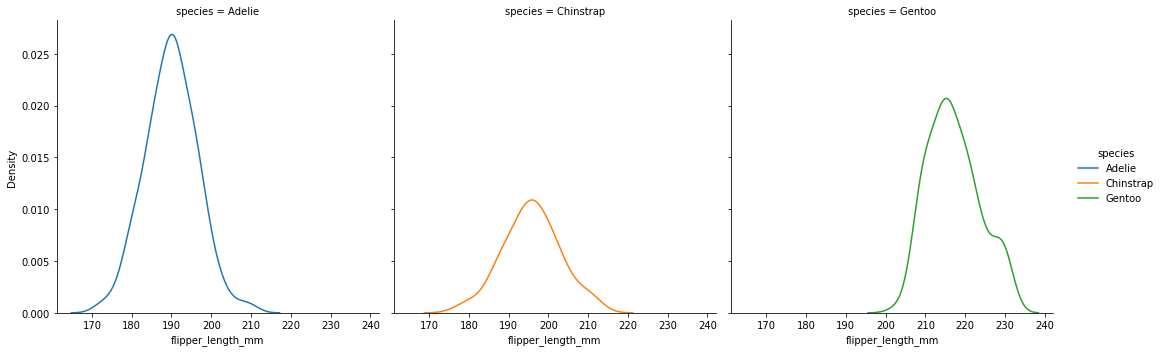

In [16]:
sns.displot(data=df, x='flipper_length_mm', 
            kind='kde', 
            hue='species', 
            col='species')

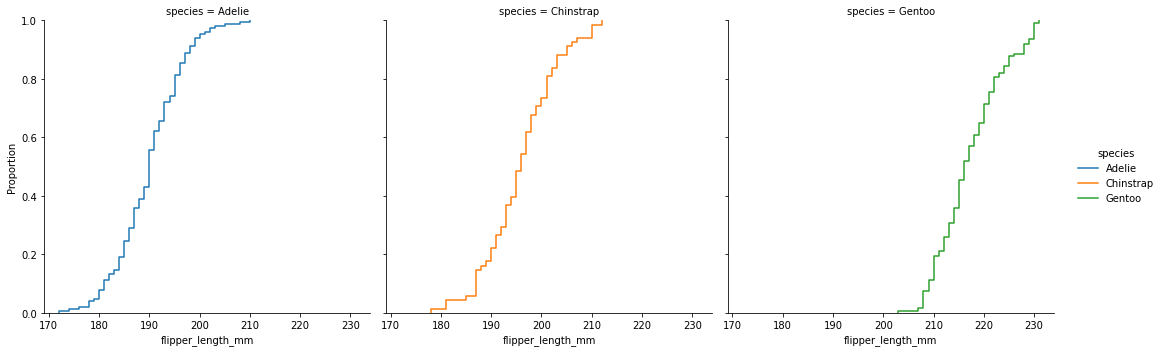

In [17]:
sns.displot(data=df, x='flipper_length_mm', 
            kind='ecdf', 
            hue='species', 
            col='species')

relplot

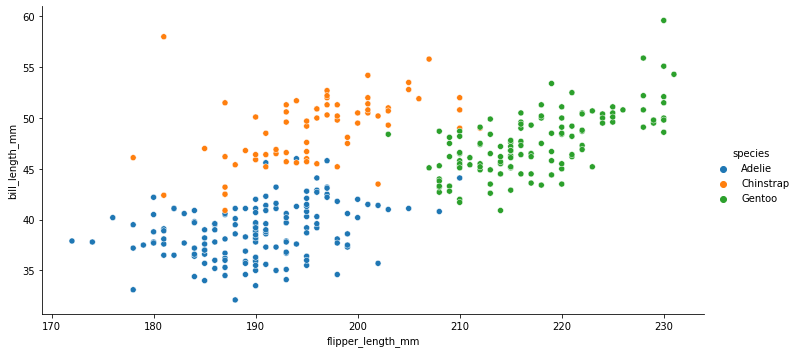

In [18]:
sns.relplot(data=df, 
            x='flipper_length_mm', 
            y='bill_length_mm', 
            hue='species', 
            kind='scatter', 
            height=5, 
            aspect=2)

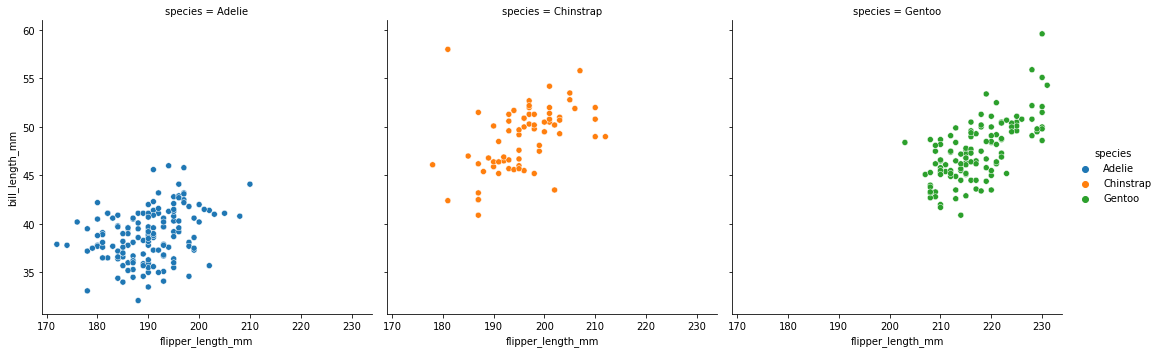

In [19]:
sns.relplot(data=df, 
            x='flipper_length_mm', 
            y='bill_length_mm', 
            hue='species', 
            kind='scatter', 
            col='species')

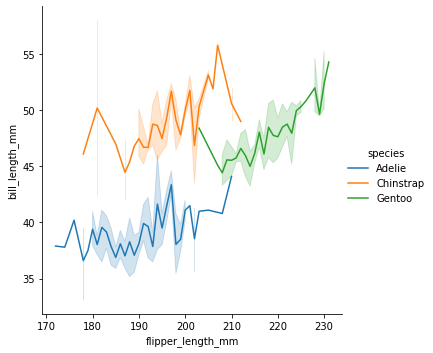

In [20]:
sns.relplot(data=df, 
            x='flipper_length_mm', 
            y='bill_length_mm', 
            hue='species', 
            kind='line')

데이터 준비
- titanic.csv

In [21]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/titanic.csv

In [22]:
df = pd.read_csv('titanic.csv')
df.shape

(891, 12)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,lost,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,saved,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,saved,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,saved,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,lost,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

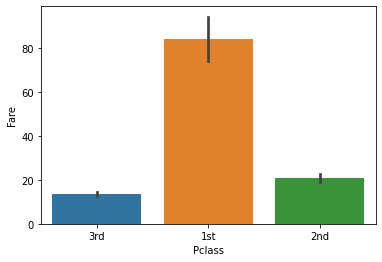

In [24]:
# 등급별 요금
sns.barplot(data=df, x='Pclass', y='Fare')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

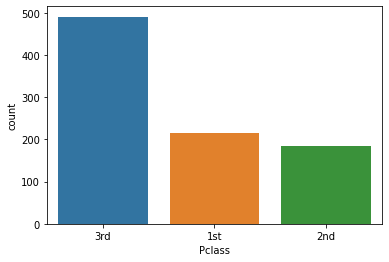

In [25]:
# 등급별 개수
sns.countplot(data=df, x='Pclass')

In [26]:
df['Pclass'].value_counts()

3rd    491
1st    216
2nd    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

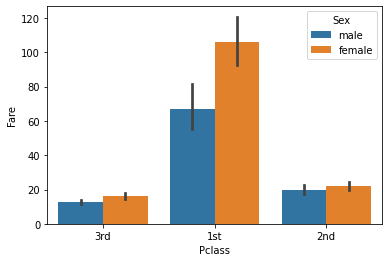

In [27]:
sns.barplot(data=df, x='Pclass', y='Fare', hue='Sex', estimator=np.mean)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

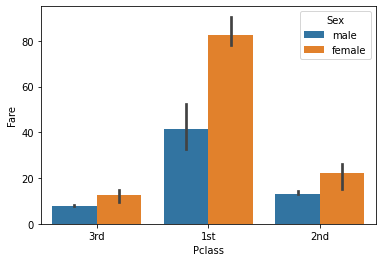

In [28]:
sns.barplot(data=df, x='Pclass', y='Fare', hue='Sex', estimator=np.median)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

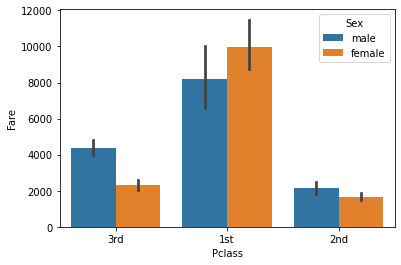

In [29]:
sns.barplot(data=df, x='Pclass', y='Fare', hue='Sex', estimator=np.sum)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

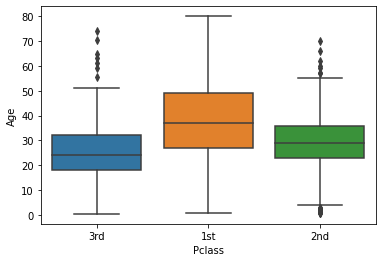

In [30]:
# 사분위수
sns.boxplot(data=df, x='Pclass', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

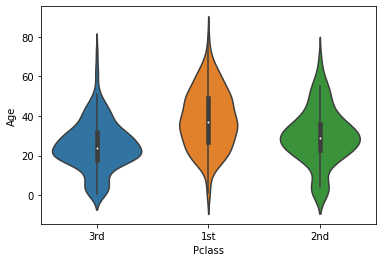

In [31]:
sns.violinplot(data=df, x='Pclass', y='Age')

sns.heatmap
- annot=True: 숫자 표시
- cbar=False: color bar 표시 안함
- cmap='coolwarm': 색상 지정

In [32]:
data = np.random.rand(3, 3)
data

array([[0.36409253, 0.88528525, 0.74236998],
       [0.78745231, 0.57403423, 0.31085528],
       [0.55999589, 0.36528254, 0.72134681]])

<AxesSubplot:>

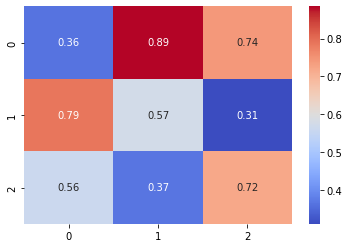

In [33]:
sns.heatmap(data, annot=True, cmap='coolwarm')

데이터 준비
- iris.csv

In [34]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/iris.csv

In [35]:
df = pd.read_csv('iris.csv', index_col=0)
df.shape

(150, 5)

In [36]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


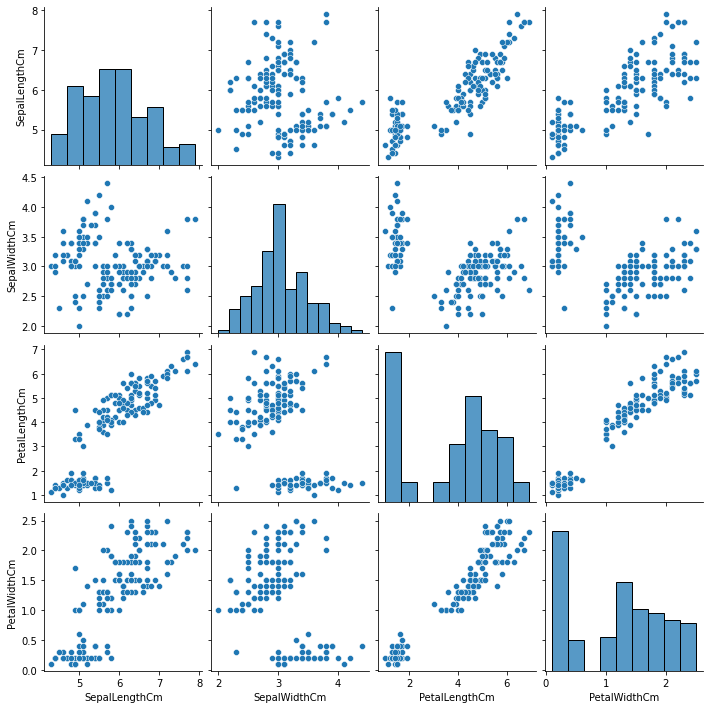

In [37]:
sns.pairplot(df)

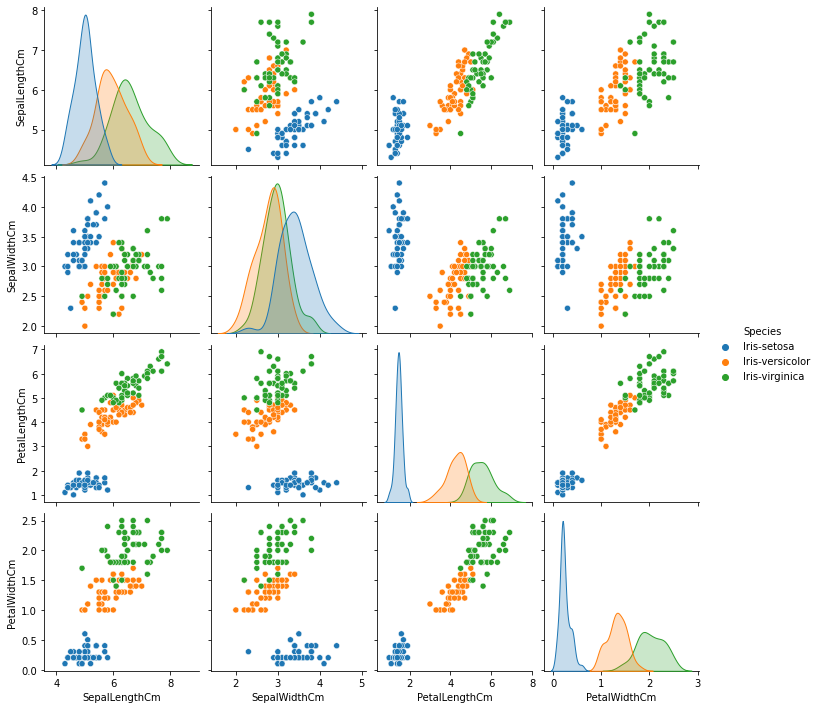

In [38]:
sns.pairplot(df, hue='Species')

데이터 준비
- tips.csv

In [39]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/tips.csv

In [40]:
df = pd.read_csv('tips.csv')
df.shape

(244, 7)

In [41]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

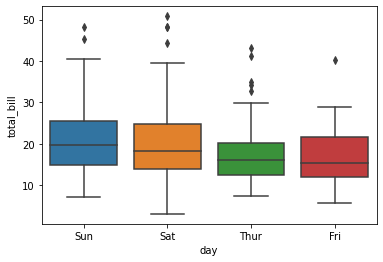

In [42]:
# 요일별 전체 요금
sns.boxplot(x='day', y='total_bill', data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

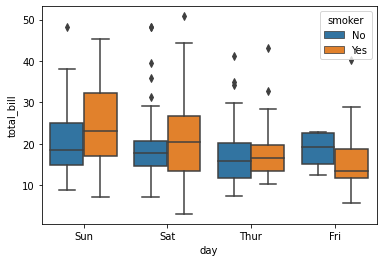

In [43]:
# 흡연 유무에 따른 요일별 전체 요금
sns.boxplot(x='day', y='total_bill', hue='smoker', data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

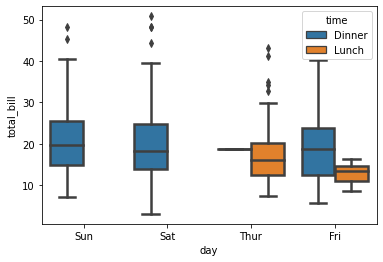

In [44]:
# 시간에 따른 요일별 전체 요금
sns.boxplot(x='day', y='total_bill', hue='time', data=df, linewidth=2.5)

<AxesSubplot:xlabel='time', ylabel='tip'>

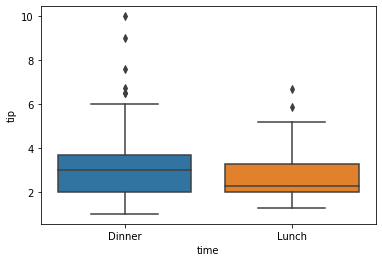

In [45]:
# 시간별 팁
sns.boxplot(x='time', y='tip', data=df, order=['Dinner', 'Lunch'])

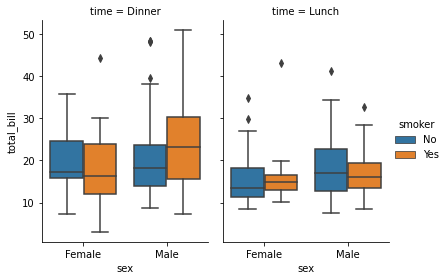

In [46]:
sns.catplot(x='sex', y='total_bill', 
            hue='smoker', col='time', 
            data=df, kind='box', 
            height=4, aspect=.7)